In [32]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# 假设df是你的数据集，已经被读入
df = pd.read_csv("easyshare_imputed.csv")

# 选择除了要预测的目标（cogscore）之外的所有特征
X = df.drop('cogscore', axis=1)
y = df['cogscore']

# 使用SelectKBest进行特征选择，这里以f_regression为例
# 选择与目标变量最相关的K个特征，这里K暂定为10，可以根据需要调整
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

# 获取被选中的特征
selected_features = X.columns[selector.get_support()]

selected_features

print()



TypeError: 'function' object is not subscriptable

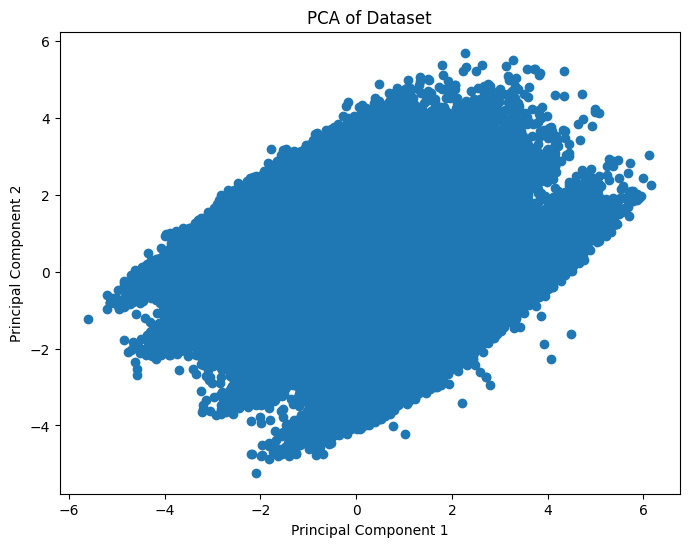

In [29]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the imputed DataFrame from the CSV file next time
df = pd.read_csv("easyshare_imputed.csv")
# 选择除了要预测的目标（cogscore）之外的所有特征
X = df.drop('cogscore', axis=1)
y = df['cogscore']
# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 应用PCA
pca = PCA(n_components = 15)  # 可以调整n_components来选择成分的数量
X_pca = pca.fit_transform(X_scaled)

# 结果DataFrame
df_pca = pd.DataFrame(data = X_pca[:,0:5], columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5'])

# # 查看PCA结果
# print(df_pca.head())
# 绘制前两个主成分的散点图
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()

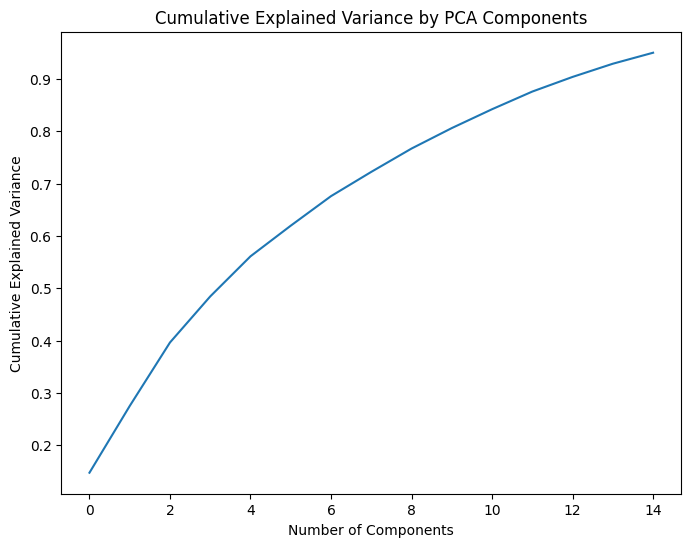

In [28]:
# 累积解释方差
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 绘制累积解释方差图
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.show()

累积解释方差（前15个主成分）:  [0.14745517 0.27503899 0.39642977 0.48449322 0.56116026 0.61973431
 0.67619481 0.72257552 0.76716774 0.80629444 0.84234729 0.87612058
 0.90410766 0.92932861 0.95036235]


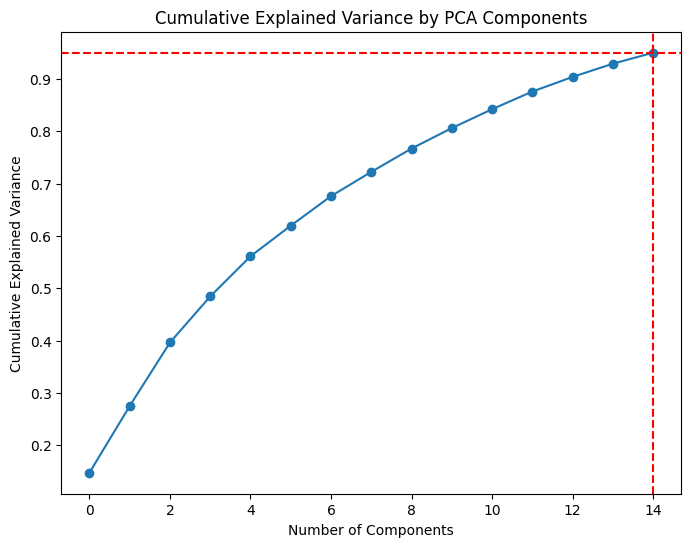

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 假设X_scaled是已经标准化的特征数据
# X_scaled = ...

# 应用PCA，使用15个主成分
pca = PCA(n_components=15)
pca.fit(X_scaled)

# 计算累积解释方差
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 打印累积解释方差
print("累积解释方差（前15个主成分）: ", cumulative_variance)

# 绘制累积解释方差图
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.axhline(y=cumulative_variance[-1], color='r', linestyle='--')
plt.axvline(x=14, color='r', linestyle='--')  # 由于索引从0开始，所以第15个成分对应的索引是14
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'n_components_'

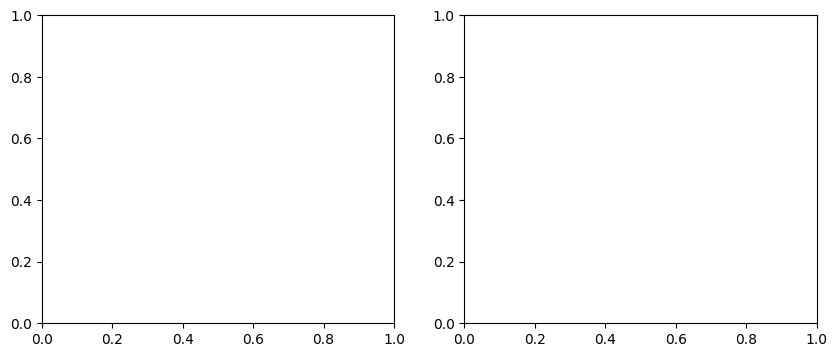

In [18]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
ticks = np.arange(X_pca.n_components_)+1
ax[0].plot(ticks, X_pca.explained_variance_ratio_, marker='o')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Proportion of Variance Explained')
ax[1].plot(ticks, X_pca.explained_variance_ratio_.cumsum(), marker='o')
ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Cummulative Proportion of Variance Explained')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 假设df_pca是PCA降维后的DataFrame，df_target是目标变量（比如cogscore）
df_pca = X_pca
df_target = df['cogscore']

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(df_pca, df_target, test_size=0.2, random_state=42)

# 训练Ridge回归模型
ridge_model = Ridge(alpha=1.0)  # alpha是正则化强度，可根据需要调整
ridge_model.fit(X_train, y_train)

# 预测测试集
y_pred = ridge_model.predict(X_test)

# 计算并打印均方误差
mse = mean_squared_error(y_test, y_pred)
print("测试集的均方误差: ", mse)


测试集的均方误差:  11.125267733504021
